# Agenda 
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 


In [1]:
import metrics as m
import cv2
from metrics import mse, psnr, ssim,lbp_distance
import suport.patchesMethods as pm

In [7]:
# load the two input images result\57cb8af8.jpg
imageA = cv2.imread(r"result\\0bdd44d530.png",0)
#imageB = cv2.imread(r"result\\57cb8af8.jpg",0)
imageB = cv2.imread(r"result\\d9c3c361.jpg",0)
# imageA = cv2.imread(r"result\\0bdd44d530.png")


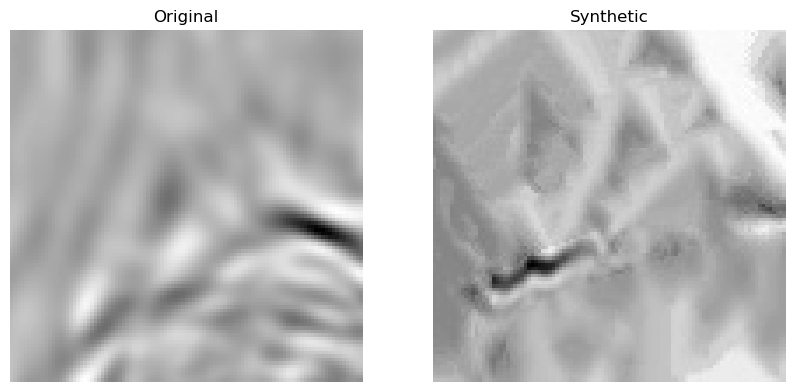

In [8]:
images = [imageA,imageB]
titles = ["Original","Synthetic"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

In [9]:
# compute the MSE between the two images
m = mse(imageA, imageB)
print(f"MSE: {m}")

MSE: 2652.973826095481


In [11]:
# compute the MSE between the two images
m = mse(imageA, imageB)

# compute the SSIM between the two images
s = ssim(imageA, imageB)
# compute euclidean distance
euclidean_distance = lbp_distance(imageA, imageB)

print(f"MSE: {m}")
print(f"Euclidean Distance: {euclidean_distance}")


print(f"SSIM: {s}")


MSE: 2652.973826095481
Euclidean Distance: 1.1911042928695679
SSIM: 0.35799964609023033
